In [1]:
# Librerias necesarias
import numpy as np
import numpy
from scipy import stats
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.morphology import remove_small_holes, erosion, square
import warnings
import math
warnings.filterwarnings("ignore")
from numpy import linalg as LA

In [2]:
def transformacion_imagen(imagen, ruido):
    nueva_imagen = []
    for i in range(len(imagen)):
        lista = []
        for j in range(len(imagen[0])):
            R = max(min(int(imagen[i][j][0] + ruido[i][j][0]),255), 0)
            G = max(min(int(imagen[i][j][1] + ruido[i][j][1]),255), 0)
            B = max(min(int(imagen[i][j][2] + ruido[i][j][2]),255), 0)
            lista.append([R,G,B])
        nueva_imagen.append(lista)
    return nueva_imagen

In [3]:
def maxima_intensidad_imagen(imagen):
    lista = []
    for i in range(len(imagen)):
        for j in range(len(imagen[0])):
            lista.append(imagen[i][j][0])
            lista.append(imagen[i][j][1])
            lista.append(imagen[i][j][2])
    maximo = max(lista)
    return maximo

In [4]:
def muestreo_normal(porcentaje, imagen):
    maxima_intensidad = maxima_intensidad_imagen(imagen)
    sigma = porcentaje*maxima_intensidad
    
    total_datos = len(imagen)*len(imagen[0])
    
    muestreo_1 = np.random.normal(0, sigma, total_datos)
    muestreo_2 = np.random.normal(0, sigma, total_datos)
    muestreo_3 = np.random.normal(0, sigma, total_datos)
    
    ruido = []
    
    alto = len(imagen)
    ancho = len(imagen[0])
    
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista.append([muestreo_1[j + i*ancho], muestreo_2[j + i*ancho], muestreo_3[j + i*ancho]])
        ruido.append(lista)
    
    return ruido

In [5]:
def imagen_para_aplicar_filtro(imagen):
    alto = len(imagen)
    ancho = len(imagen[0])
    
    matriz = []
    
    for i in range(alto+4):
        lista = []
        for j in range(ancho+4):
            if i == 0 or i == 1 or i == alto + 3 or i == alto + 2 or j == 0 or j == 1 or j == ancho + 3 or j == ancho + 2:
                lista.append([0, 0, 0])
            else:
                lista.append([imagen[i-2][j-2][0], imagen[i-2][j-2][1], imagen[i-2][j-2][2]])
                
        matriz.append(lista)
    
    return matriz

In [6]:
def filtro_media(imagen):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista_R = []
            lista_R.append(imagen_filtro[i+1][j+1][0])
            lista_R.append(imagen_filtro[i+1][j+2][0])
            lista_R.append(imagen_filtro[i+1][j+3][0])
            lista_R.append(imagen_filtro[i+2][j+1][0])
            lista_R.append(imagen_filtro[i+2][j+2][0])
            lista_R.append(imagen_filtro[i+2][j+3][0])
            lista_R.append(imagen_filtro[i+3][j+1][0])
            lista_R.append(imagen_filtro[i+3][j+2][0])
            lista_R.append(imagen_filtro[i+3][j+3][0])
            lista_G = []
            lista_G.append(imagen_filtro[i+1][j+1][1])
            lista_G.append(imagen_filtro[i+1][j+2][1])
            lista_G.append(imagen_filtro[i+1][j+3][1])
            lista_G.append(imagen_filtro[i+2][j+1][1])
            lista_G.append(imagen_filtro[i+2][j+2][1])
            lista_G.append(imagen_filtro[i+2][j+3][1])
            lista_G.append(imagen_filtro[i+3][j+1][1])
            lista_G.append(imagen_filtro[i+3][j+2][1])
            lista_G.append(imagen_filtro[i+3][j+3][1])
            lista_B = []
            lista_B.append(imagen_filtro[i+1][j+1][2])
            lista_B.append(imagen_filtro[i+1][j+2][2])
            lista_B.append(imagen_filtro[i+1][j+3][2])
            lista_B.append(imagen_filtro[i+2][j+1][2])
            lista_B.append(imagen_filtro[i+2][j+2][2])
            lista_B.append(imagen_filtro[i+2][j+3][2])
            lista_B.append(imagen_filtro[i+3][j+1][2])
            lista_B.append(imagen_filtro[i+3][j+2][2])
            lista_B.append(imagen_filtro[i+3][j+3][2])
            lista.append([int(np.mean(lista_R)), int(np.mean(lista_G)), int(np.mean(lista_B))])
        matriz.append(lista)    
    return matriz

In [7]:
def filtro_sobel_X(imagen):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    
    alto = len(imagen)
    ancho = len(imagen[0])
    
    matriz = []
    
    for i in range(alto):
        lista = []
        for j in range(ancho):
            
            valor_rojo_1 = imagen_filtro[i+1][j+1][0] + 2*imagen_filtro[i+2][j+1][0] + imagen_filtro[i+3][j+1][0]
            valor_rojo_2 = imagen_filtro[i+1][j+3][0] + 2*imagen_filtro[i+2][j+3][0] + imagen_filtro[i+3][j+3][0]
            valor_rojo_3 = valor_rojo_2 - valor_rojo_1
            valor_rojo = int(max(min(valor_rojo_3, 255), 0))
            
            valor_verde_1 = imagen_filtro[i+1][j+1][1] + 2*imagen_filtro[i+2][j+1][1] + imagen_filtro[i+3][j+1][1]
            valor_verde_2 = imagen_filtro[i+1][j+3][1] + 2*imagen_filtro[i+2][j+3][1] + imagen_filtro[i+3][j+3][1]
            valor_verde_3 = valor_verde_2 - valor_verde_1
            valor_verde = int(max(min(valor_verde_3, 255), 0))
            
            valor_azul_1 = imagen_filtro[i+1][j+1][2] + 2*imagen_filtro[i+2][j+1][2] + imagen_filtro[i+3][j+1][2]
            valor_azul_2 = imagen_filtro[i+1][j+3][2] + 2*imagen_filtro[i+2][j+3][2] + imagen_filtro[i+3][j+3][2]
            valor_azul_3 = valor_azul_2 - valor_azul_1
            valor_azul = int(max(min(valor_azul_3, 255), 0))
        
            lista.append([valor_rojo, valor_verde, valor_azul])
            
        matriz.append(lista)
    
    return matriz

In [8]:
def filtro_sobel_Y(imagen):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    
    alto = len(imagen)
    ancho = len(imagen[0])
    
    matriz = []
    
    for i in range(alto):
        lista = []
        for j in range(ancho):
            
            valor_rojo_1 = imagen_filtro[i+1][j+1][0] + 2*imagen_filtro[i+1][j+2][0] + imagen_filtro[i+1][j+3][0]
            valor_rojo_2 = imagen_filtro[i+3][j+1][0] + 2*imagen_filtro[i+3][j+2][0] + imagen_filtro[i+3][j+3][0]
            valor_rojo_3 = valor_rojo_2 - valor_rojo_1
            valor_rojo = int(max(min(valor_rojo_3, 255), 0))
            
            valor_verde_1 = imagen_filtro[i+1][j+1][1] + 2*imagen_filtro[i+1][j+2][1] + imagen_filtro[i+1][j+3][1]
            valor_verde_2 = imagen_filtro[i+3][j+1][1] + 2*imagen_filtro[i+3][j+2][1] + imagen_filtro[i+3][j+3][1]
            valor_verde_3 = valor_verde_2 - valor_verde_1
            valor_verde = int(max(min(valor_verde_3, 255), 0))
            
            valor_azul_1 = imagen_filtro[i+1][j+1][2] + 2*imagen_filtro[i+1][j+2][2] + imagen_filtro[i+1][j+3][2]
            valor_azul_2 = imagen_filtro[i+3][j+1][2] + 2*imagen_filtro[i+3][j+2][2] + imagen_filtro[i+3][j+3][2]
            valor_azul_3 = valor_azul_2 - valor_azul_1
            valor_azul = int(max(min(valor_azul_3, 255), 0))
        
            lista.append([valor_rojo, valor_verde, valor_azul])
            
        matriz.append(lista)
    
    return matriz

In [9]:
def imagen_para_aplicar_filtro_2(imagen):
    alto = len(imagen)
    ancho = len(imagen[0])
    
    matriz = []
    
    for i in range(alto+8):
        lista = []
        for j in range(ancho+8):
            verdad_1 = (i == 0 or i == 1 or i == 2 or i == 3)
            verdad_2 = ((i == alto + 4) or (i == alto + 5) or (i == alto + 6) or (i == alto + 7))
            verdad_3 = (j == 0 or j == 1 or j == 2 or j == 3)
            verdad_4 = ((j == ancho + 7) or (j == ancho + 6) or (j == ancho + 5) or (j == ancho + 4))
            
            if verdad_1 or verdad_2 or verdad_3 or verdad_4:
                lista.append([0, 0, 0])
            else:
                lista.append([imagen[i-4][j-4][0], imagen[i-4][j-4][1], imagen[i-4][j-4][2]])
        matriz.append(lista)
    return matriz

In [10]:
def filtro_sobel_media_X(imagen):
    imagen_filtro = imagen_para_aplicar_filtro_2(imagen)
    
    alto = len(imagen)
    ancho = len(imagen[0])
    
    matriz = []
    
    for i in range(alto):
        lista = []
        for j in range(ancho):
            
            k_1 = i+4
            k_2 = j+4
            
            parte_1_r = (- imagen_filtro[k_1-2][k_2-2][0] - imagen_filtro[k_1-2][k_2-1][0])/9
            parte_2_r = (imagen_filtro[k_1-2][k_2+2][0] + imagen_filtro[k_1-2][k_2+1][0])/9
            parte_3_r = (- imagen_filtro[k_1-1][k_2-2][0] - imagen_filtro[k_1-1][k_2-1][0])/3
            parte_4_r = (imagen_filtro[k_1-1][k_2+2][0] + imagen_filtro[k_1-1][k_2+1][0])/3
            parte_5_r = (- imagen_filtro[k_1][k_2-2][0] - imagen_filtro[k_1][k_2-1][0])*(4/9)
            parte_6_r = (imagen_filtro[k_1][k_2+2][0] + imagen_filtro[k_1][k_2+1][0])*(4/9)
            parte_7_r = (- imagen_filtro[k_1+1][k_2-2][0] - imagen_filtro[k_1+1][k_2-1][0])/3
            parte_8_r = (imagen_filtro[k_1+1][k_2+2][0] + imagen_filtro[k_1+1][k_2+1][0])/3
            parte_9_r = (- imagen_filtro[k_1+2][k_2-2][0] - imagen_filtro[k_1+2][k_2-1][0])/9
            parte_10_r = (imagen_filtro[k_1+2][k_2+2][0] + imagen_filtro[k_1+2][k_2+1][0])/9
            
            valor_rojo = parte_1_r + parte_2_r + parte_3_r + parte_4_r + parte_5_r
            valor_rojo = valor_rojo + parte_6_r + parte_7_r + parte_8_r + parte_9_r + parte_10_r
            valor_rojo = int(max(min(valor_rojo, 255), 0))
            
            parte_1_g = (- imagen_filtro[k_1-2][k_2-2][1] - imagen_filtro[k_1-2][k_2-1][1])/9
            parte_2_g = (imagen_filtro[k_1-2][k_2+2][1] + imagen_filtro[k_1-2][k_2+1][1])/9
            parte_3_g = (- imagen_filtro[k_1-1][k_2-2][1] - imagen_filtro[k_1-1][k_2-1][1])/3
            parte_4_g = (imagen_filtro[k_1-1][k_2+2][1] + imagen_filtro[k_1-1][k_2+1][1])/3
            parte_5_g = (- imagen_filtro[k_1][k_2-2][1] - imagen_filtro[k_1][k_2-1][1])*(4/9)
            parte_6_g = (imagen_filtro[k_1][k_2+2][1] + imagen_filtro[k_1][k_2+1][1])*(4/9)
            parte_7_g = (- imagen_filtro[k_1+1][k_2-2][1] - imagen_filtro[k_1+1][k_2-1][1])/3
            parte_8_g = (imagen_filtro[k_1+1][k_2+2][1] + imagen_filtro[k_1+1][k_2+1][1])/3
            parte_9_g = (- imagen_filtro[k_1+2][k_2-2][1] - imagen_filtro[k_1+2][k_2-1][1])/9
            parte_10_g = (imagen_filtro[k_1+2][k_2+2][1] + imagen_filtro[k_1+2][k_2+1][1])/9
            
            valor_verde = parte_1_g + parte_2_g + parte_3_g + parte_4_g + parte_5_g
            valor_verde = valor_verde + parte_6_g + parte_7_g + parte_8_g + parte_9_g + parte_10_g
            valor_verde = int(max(min(valor_verde, 255), 0))
            
            parte_1_b = (- imagen_filtro[k_1-2][k_2-2][2] - imagen_filtro[k_1-2][k_2-1][2])/9
            parte_2_b = (imagen_filtro[k_1-2][k_2+2][2] + imagen_filtro[k_1-2][k_2+1][2])/9
            parte_3_b = (- imagen_filtro[k_1-1][k_2-2][2] - imagen_filtro[k_1-1][k_2-1][2])/3
            parte_4_b = (imagen_filtro[k_1-1][k_2+2][2] + imagen_filtro[k_1-1][k_2+1][2])/3
            parte_5_b = (- imagen_filtro[k_1][k_2-2][2] - imagen_filtro[k_1][k_2-1][2])*(4/9)
            parte_6_b = (imagen_filtro[k_1][k_2+2][2] + imagen_filtro[k_1][k_2+1][2])*(4/9)
            parte_7_b = (- imagen_filtro[k_1+1][k_2-2][2] - imagen_filtro[k_1+1][k_2-1][2])/3
            parte_8_b = (imagen_filtro[k_1+1][k_2+2][2] + imagen_filtro[k_1+1][k_2+1][2])/3
            parte_9_b = (- imagen_filtro[k_1+2][k_2-2][2] - imagen_filtro[k_1+2][k_2-1][2])/9
            parte_10_b = (imagen_filtro[k_1+2][k_2+2][2] + imagen_filtro[k_1+2][k_2+1][2])/9
            
            valor_azul = parte_1_b + parte_2_b + parte_3_b + parte_4_b + parte_5_b
            valor_azul = valor_azul + parte_6_b + parte_7_b + parte_8_b + parte_9_b + parte_10_b
            valor_azul = int(max(min(valor_azul, 255), 0))
            
            lista.append([valor_rojo, valor_verde, valor_azul])
            
        matriz.append(lista)
    
    return matriz

In [11]:
def filtro_sobel_media_Y(imagen):
    imagen_filtro = imagen_para_aplicar_filtro_2(imagen)
    
    alto = len(imagen)
    ancho = len(imagen[0])
    
    matriz = []
    
    for i in range(alto):
        lista = []
        for j in range(ancho):
            
            k_1 = i+4
            k_2 = j+4
            
            parte_1_r = (- imagen_filtro[k_1-2][k_2-2][0] - imagen_filtro[k_1-1][k_2-2][0])/9
            parte_2_r = (imagen_filtro[k_1+1][k_2-2][0] + imagen_filtro[k_1+2][k_2-2][0])/9
            parte_3_r = (- imagen_filtro[k_1-2][k_2-1][0] - imagen_filtro[k_1-1][k_2-1][0])/3
            parte_4_r = (imagen_filtro[k_1+1][k_2-1][0] + imagen_filtro[k_1+2][k_2-1][0])/3
            parte_5_r = (- imagen_filtro[k_1-2][k_2][0] - imagen_filtro[k_1-1][k_2][0])*(4/9)
            parte_6_r = (imagen_filtro[k_1+1][k_2][0] + imagen_filtro[k_1+2][k_2][0])*(4/9)
            parte_7_r = (- imagen_filtro[k_1-2][k_2+1][0] - imagen_filtro[k_1-1][k_2+1][0])/3
            parte_8_r = (imagen_filtro[k_1+1][k_2+1][0] + imagen_filtro[k_1+2][k_2+1][0])/3    
            parte_9_r = (- imagen_filtro[k_1-1][k_2+2][0] - imagen_filtro[k_1-2][k_2+2][0])/9
            parte_10_r = (imagen_filtro[k_1+2][k_2+2][0] + imagen_filtro[k_1+1][k_2+2][0])/9
            
            valor_rojo = parte_1_r + parte_2_r + parte_3_r + parte_4_r + parte_5_r
            valor_rojo = valor_rojo + parte_6_r + parte_7_r + parte_8_r + parte_9_r + parte_10_r
            valor_rojo = int(max(min(valor_rojo, 255), 0))
            
            parte_1_g = (- imagen_filtro[k_1-2][k_2-2][1] - imagen_filtro[k_1-1][k_2-2][1])/9
            parte_2_g = (imagen_filtro[k_1+1][k_2-2][1] + imagen_filtro[k_1+2][k_2-2][1])/9
            parte_3_g = (- imagen_filtro[k_1-2][k_2-1][1] - imagen_filtro[k_1-1][k_2-1][1])/3
            parte_4_g = (imagen_filtro[k_1+1][k_2-1][1] + imagen_filtro[k_1+2][k_2-1][1])/3
            parte_5_g = (- imagen_filtro[k_1-2][k_2][1] - imagen_filtro[k_1-1][k_2][1])*(4/9)
            parte_6_g = (imagen_filtro[k_1+1][k_2][1] + imagen_filtro[k_1+2][k_2][1])*(4/9)
            parte_7_g = (- imagen_filtro[k_1-2][k_2+1][1] - imagen_filtro[k_1-1][k_2+1][1])/3
            parte_8_g = (imagen_filtro[k_1+1][k_2+1][1] + imagen_filtro[k_1+2][k_2+1][1])/3    
            parte_9_g = (- imagen_filtro[k_1-1][k_2+2][1] - imagen_filtro[k_1-2][k_2+2][1])/9
            parte_10_g = (imagen_filtro[k_1+2][k_2+2][1] + imagen_filtro[k_1+1][k_2+2][1])/9
            
            valor_verde = parte_1_g + parte_2_g + parte_3_g + parte_4_g + parte_5_g
            valor_verde = valor_verde + parte_6_g + parte_7_g + parte_8_g + parte_9_g + parte_10_g
            valor_verde = int(max(min(valor_verde, 255), 0))
            
            parte_1_b = (- imagen_filtro[k_1-2][k_2-2][2] - imagen_filtro[k_1-1][k_2-2][2])/9
            parte_2_b = (imagen_filtro[k_1+1][k_2-2][2] + imagen_filtro[k_1+2][k_2-2][2])/9
            parte_3_b = (- imagen_filtro[k_1-2][k_2-1][2] - imagen_filtro[k_1-1][k_2-1][2])/3
            parte_4_b = (imagen_filtro[k_1+1][k_2-1][2] + imagen_filtro[k_1+2][k_2-1][2])/3
            parte_5_b = (- imagen_filtro[k_1-2][k_2][2] - imagen_filtro[k_1-1][k_2][2])*(4/9)
            parte_6_b = (imagen_filtro[k_1+1][k_2][2] + imagen_filtro[k_1+2][k_2][2])*(4/9)
            parte_7_b = (- imagen_filtro[k_1-2][k_2+1][2] - imagen_filtro[k_1-1][k_2+1][2])/3
            parte_8_b = (imagen_filtro[k_1+1][k_2+1][2] + imagen_filtro[k_1+2][k_2+1][2])/3    
            parte_9_b = (- imagen_filtro[k_1-1][k_2+2][2] - imagen_filtro[k_1-2][k_2+2][2])/9
            parte_10_b = (imagen_filtro[k_1+2][k_2+2][2] + imagen_filtro[k_1+1][k_2+2][2])/9
            
            valor_azul = parte_1_b + parte_2_b + parte_3_b + parte_4_b + parte_5_b
            valor_azul = valor_azul + parte_6_b + parte_7_b + parte_8_b + parte_9_b + parte_10_b
            valor_azul = int(max(min(valor_azul, 255), 0))
            
            lista.append([valor_rojo, valor_verde, valor_azul])
            
        matriz.append(lista)
    
    return matriz

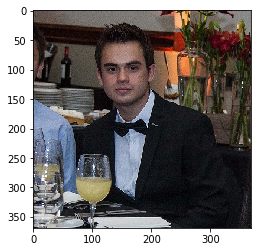

In [12]:
# CARGAR IMAGEN
# Beto

beto = plt.imread('beto.jpg')
plt.imshow(beto)

In [13]:
#Creacion de imagen con ruido 1

porcentaje_1 = 0.05
ruido_1 = muestreo_normal(porcentaje_1, beto)
nueva_imagen_1_beto = transformacion_imagen(beto, ruido_1)

In [14]:
#Creacion de imagen con ruido 2

porcentaje_2 = 0.03
ruido_2 = muestreo_normal(porcentaje_2, beto)
nueva_imagen_2_beto = transformacion_imagen(beto, ruido_2)

In [15]:
#Creacion de imagen con ruido 3

porcentaje_3 = 0.01
ruido_3 = muestreo_normal(porcentaje_3, beto)
nueva_imagen_3_beto = transformacion_imagen(beto, ruido_3)

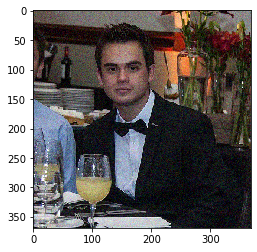

In [16]:
plt.imshow(nueva_imagen_1_beto)

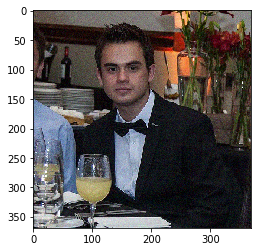

In [17]:
plt.imshow(nueva_imagen_2_beto)

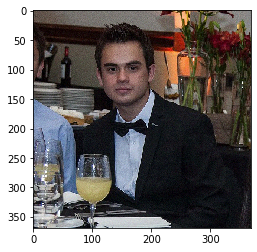

In [18]:
plt.imshow(nueva_imagen_3_beto)

In [19]:
filtro_media_1_beto = filtro_media(nueva_imagen_1_beto)

In [20]:
filtro_media_2_beto = filtro_media(nueva_imagen_2_beto)

In [21]:
filtro_media_3_beto = filtro_media(nueva_imagen_3_beto)

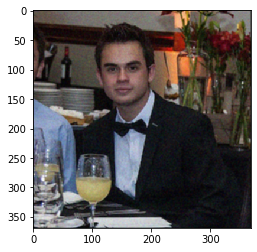

In [22]:
plt.imshow(filtro_media_1_beto)

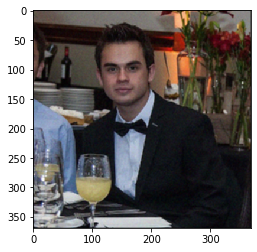

In [23]:
plt.imshow(filtro_media_2_beto)

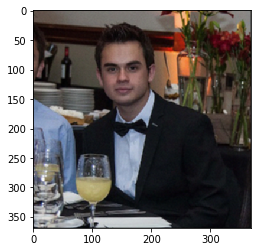

In [24]:
plt.imshow(filtro_media_3_beto)

In [25]:
filtro_sobel_combinado_1_X_beto = filtro_sobel_media_X(nueva_imagen_1_beto)
filtro_sobel_combinado_1_Y_beto = filtro_sobel_media_Y(nueva_imagen_1_beto)

In [26]:
filtro_sobel_combinado_2_X_beto = filtro_sobel_media_X(nueva_imagen_2_beto)
filtro_sobel_combinado_2_Y_beto = filtro_sobel_media_Y(nueva_imagen_2_beto)

In [27]:
filtro_sobel_combinado_3_X_beto = filtro_sobel_media_X(nueva_imagen_3_beto)
filtro_sobel_combinado_3_Y_beto = filtro_sobel_media_Y(nueva_imagen_3_beto)

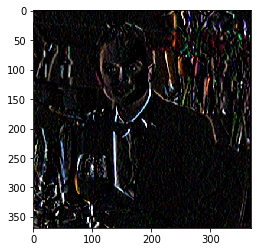

In [28]:
plt.imshow(filtro_sobel_combinado_1_X_beto)

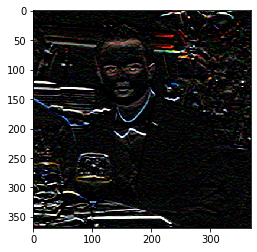

In [29]:
plt.imshow(filtro_sobel_combinado_1_Y_beto)

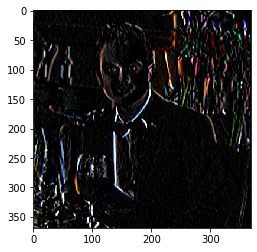

In [30]:
plt.imshow(filtro_sobel_combinado_2_X_beto)

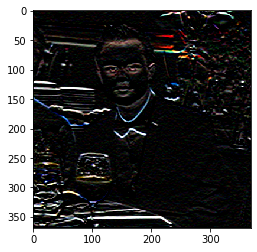

In [31]:
plt.imshow(filtro_sobel_combinado_2_Y_beto)

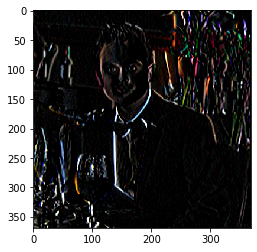

In [32]:
plt.imshow(filtro_sobel_combinado_3_X_beto)

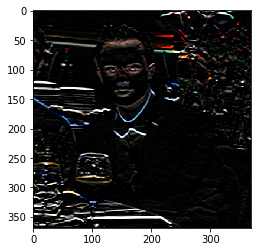

In [33]:
plt.imshow(filtro_sobel_combinado_3_Y_beto)

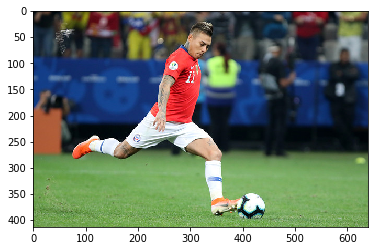

In [34]:
# CARGAR IMAGEN
# Vargas

vargas = plt.imread('vargas.jpg')
plt.imshow(vargas)

In [35]:
#Creacion de imagen con ruido 1

porcentaje_1 = 0.05
ruido_1 = muestreo_normal(porcentaje_1, vargas)
nueva_imagen_1_vargas = transformacion_imagen(vargas, ruido_1)

In [36]:
#Creacion de imagen con ruido 2

porcentaje_2 = 0.03
ruido_2 = muestreo_normal(porcentaje_2, vargas)
nueva_imagen_2_vargas = transformacion_imagen(vargas, ruido_2)

In [37]:
#Creacion de imagen con ruido 3

porcentaje_3 = 0.01
ruido_3 = muestreo_normal(porcentaje_3, vargas)
nueva_imagen_3_vargas = transformacion_imagen(vargas, ruido_3)

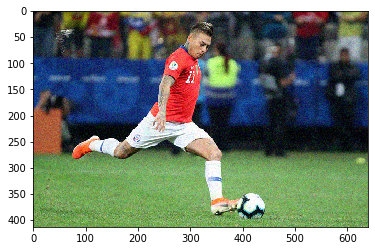

In [38]:
plt.imshow(nueva_imagen_1_vargas)

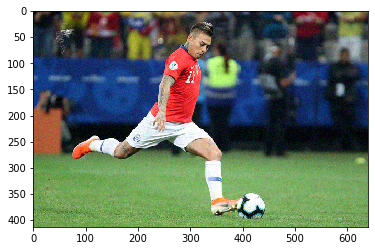

In [39]:
plt.imshow(nueva_imagen_2_vargas)

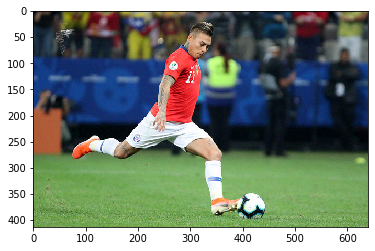

In [40]:
plt.imshow(nueva_imagen_3_vargas)

In [41]:
filtro_media_1_vargas = filtro_media(nueva_imagen_1_vargas)

In [42]:
filtro_media_2_vargas = filtro_media(nueva_imagen_2_vargas)

In [43]:
filtro_media_3_vargas = filtro_media(nueva_imagen_3_vargas)

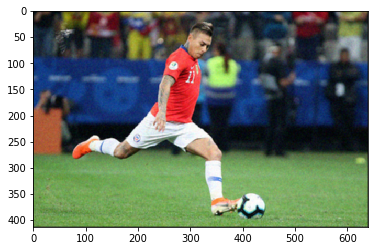

In [44]:
plt.imshow(filtro_media_1_vargas)

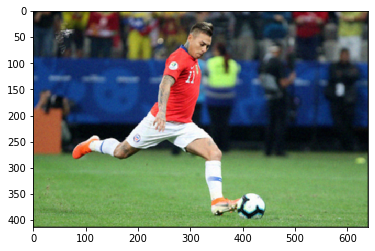

In [45]:
plt.imshow(filtro_media_2_vargas)

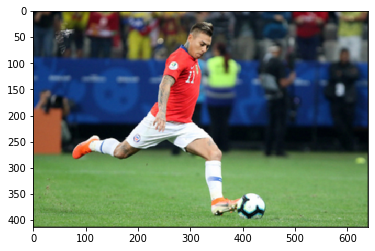

In [46]:
plt.imshow(filtro_media_3_vargas)

In [47]:
filtro_sobel_combinado_1_X_vargas = filtro_sobel_media_X(nueva_imagen_1_vargas)
filtro_sobel_combinado_1_Y_vargas = filtro_sobel_media_Y(nueva_imagen_1_vargas)

In [48]:
filtro_sobel_combinado_2_X_vargas = filtro_sobel_media_X(nueva_imagen_2_vargas)
filtro_sobel_combinado_2_Y_vargas = filtro_sobel_media_Y(nueva_imagen_2_vargas)

In [49]:
filtro_sobel_combinado_3_X_vargas = filtro_sobel_media_X(nueva_imagen_3_vargas)
filtro_sobel_combinado_3_Y_vargas = filtro_sobel_media_Y(nueva_imagen_3_vargas)

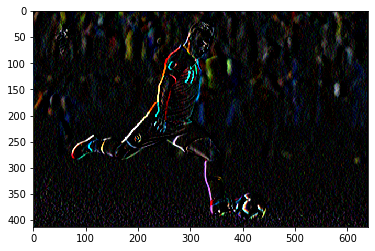

In [50]:
plt.imshow(filtro_sobel_combinado_1_X_vargas)

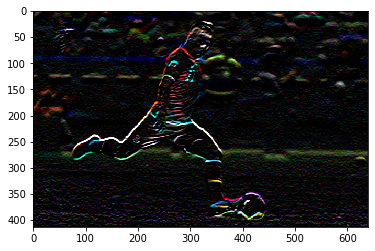

In [51]:
plt.imshow(filtro_sobel_combinado_1_Y_vargas)

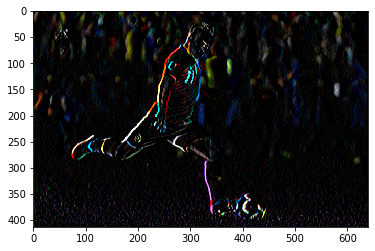

In [52]:
plt.imshow(filtro_sobel_combinado_2_X_vargas)

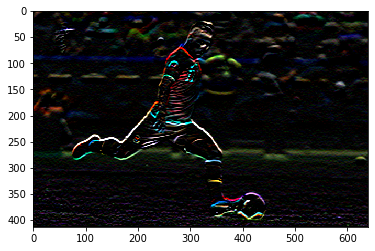

In [53]:
plt.imshow(filtro_sobel_combinado_2_Y_vargas)

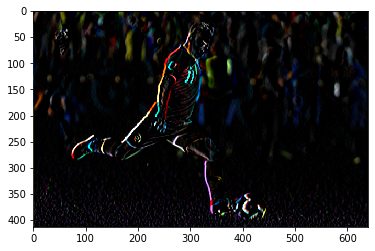

In [54]:
plt.imshow(filtro_sobel_combinado_3_X_vargas)

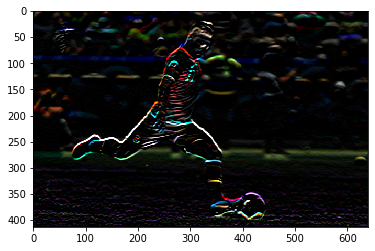

In [55]:
plt.imshow(filtro_sobel_combinado_3_Y_vargas)

$Bonus$

Para esta sección lo primero que hicimos fue implementar un función que analiza cada pixel de la imagen y si el pixel tiene norma 1 mayor a un valor de tolerancia, entonces el pixel se transforma en $[255,255,255]$ y si es menor el pixel se transforma en $[0,0,0]$. Todo esto se hará sobre imagenes que ya se les acentuaron los bordes. Todo esto se hace con el fin de poder determinar los bordes de mejor manera.

Una vez hecho esto, se implementara una función que partirá en un punto y buscara cuales son sus limites horizontales, todo esto se hace con el fin de poder determinar en cuanto a coordenadas de pixeles cual es el borde de una figura en particular.

Para lograr la tarea mencionada anteriormente lo que hicimos fue imprimir estos valores para una lista de pixeles y dado que estos bordes no son perfectos, se elijen a algunos pixeles que delimitan mejor y luego se interpolan. Para esta sección habrán MUCHOS prints que quizás no sea de su interes, así que si ese es el caso, recomiendo pasar a la parte final donde derechamente aplico el borrado de los objetos particulares. 

Para mi foto borrare una vaso y para la foto del futbolista borrare el balon de futbol.

In [56]:
def definicion_imagen(imagen, tolerancia):
    matriz = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            valor = LA.norm(imagen[i][j], 1)
            if valor > tolerancia:
                fila.append([255, 255, 255])
            else:
                fila.append([0, 0, 0])
        matriz.append(fila)
    return matriz    

In [57]:
def busqueda_horizontal(imagen, altura, pto_inicio):
    ancho = len(imagen[0])
    lista_derecha = []
    for i in range(pto_inicio, ancho):
        if imagen[altura][i] == [255, 255, 255]:
            lista_derecha.append(i)
    if len(lista_derecha) == 0:
        maximo = len(imagen[0])
    else:
        maximo = min(lista_derecha)
    
    lista_izquierda = []
    for j in range(0, pto_inicio):
        if imagen[altura][j] == [255, 255, 255]:
            lista_izquierda.append(j)
    if len(lista_izquierda) == 0:
        minimo = 0
    else:
        minimo = max(lista_izquierda)
    
    return [minimo, maximo]       

In [58]:
# Aplicacion sobre mi imagen

imagen_beto_a_definir = filtro_sobel_combinado_1_X_beto

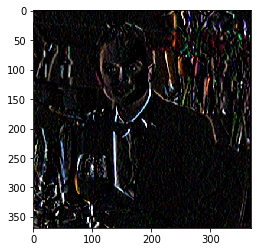

In [59]:
plt.imshow(imagen_beto_a_definir)

In [60]:
tolerancia = 75

imagen_definida_beto = definicion_imagen(imagen_beto_a_definir, tolerancia)

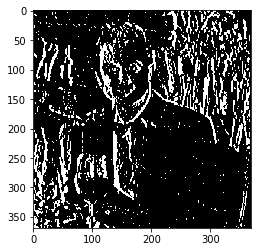

In [61]:
plt.imshow(imagen_definida_beto)

In [62]:
#Inicio de seccion con muchos prints

maximos = []
minimos = []
for i in range(325, len(imagen_definida_beto)):
    busqueda = busqueda_horizontal(imagen_definida_beto, i, 100)
    maximos.append(busqueda[1])
    minimos.append(busqueda[0])

for i in range(len(minimos)):
    print([minimos[i], maximos[i]])

[96, 105]
[96, 105]
[97, 104]
[96, 104]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[99, 100]
[97, 262]
[97, 103]
[96, 101]
[96, 101]
[96, 101]
[97, 102]
[98, 102]
[98, 102]
[98, 102]
[98, 107]
[97, 107]
[97, 107]
[97, 107]
[97, 105]
[97, 105]
[97, 105]
[97, 105]
[98, 104]
[98, 102]
[97, 102]


In [63]:
for j in range(280, 325):
    busqueda = busqueda_horizontal(imagen_definida_beto, j, 100)
    print("Iteracion:", j)
    print("Minimo:", busqueda[0])
    print("Maximo:", busqueda[1])
    print("--------------")

Iteracion: 280
Minimo: 99
Maximo: 100
--------------
Iteracion: 281
Minimo: 99
Maximo: 100
--------------
Iteracion: 282
Minimo: 99
Maximo: 100
--------------
Iteracion: 283
Minimo: 99
Maximo: 100
--------------
Iteracion: 284
Minimo: 81
Maximo: 100
--------------
Iteracion: 285
Minimo: 98
Maximo: 101
--------------
Iteracion: 286
Minimo: 98
Maximo: 102
--------------
Iteracion: 287
Minimo: 98
Maximo: 102
--------------
Iteracion: 288
Minimo: 98
Maximo: 137
--------------
Iteracion: 289
Minimo: 73
Maximo: 137
--------------
Iteracion: 290
Minimo: 74
Maximo: 137
--------------
Iteracion: 291
Minimo: 74
Maximo: 135
--------------
Iteracion: 292
Minimo: 77
Maximo: 135
--------------
Iteracion: 293
Minimo: 77
Maximo: 135
--------------
Iteracion: 294
Minimo: 74
Maximo: 135
--------------
Iteracion: 295
Minimo: 75
Maximo: 135
--------------
Iteracion: 296
Minimo: 82
Maximo: 137
--------------
Iteracion: 297
Minimo: 81
Maximo: 137
--------------
Iteracion: 298
Minimo: 75
Maximo: 137
--------

In [64]:
# 240 [73, 137]
# Lo mismo hasta el 290
# 290 [73, 137]
# 291 [73, ]
# 292 [73, ]
# 293 [73, ]
# 294 [74, ]
# 295 [74, ]
# 296 [74, ]
# 297 [75, ]
# 298 [75, ]
# 299 [75, ]
# 300 [76, ]
# 301 [76, ]
# 302 [76, ]
# 303 [77, ]
# 304 [77, ]
# 305 [77, ]
# 306 [78, ]
# 307 [78, ]
# 308 [78, ]
# 309 [79, 124]
# 310 [79, 124]
# 311 [79, 123]
# 312 []
# 313 []
# 314 []
# 315 []
# 316 []
# 317 []
# 318 []
# 319 [86, ]
# 320 [88,]
# 321 []
# 322 []
# 323 [94, 110]
# 324 [95, 110]
# 325 [93, 109]
# Así hasta el final 

In [65]:
# Ahora calculamos cada uno con regresión

for i in range(290, 310):
    print("Numero i:", i)
    print(int(((79-73)/(309-290))*(i-290))+73)
    print("-------------")


Numero i: 290
73
-------------
Numero i: 291
73
-------------
Numero i: 292
73
-------------
Numero i: 293
73
-------------
Numero i: 294
74
-------------
Numero i: 295
74
-------------
Numero i: 296
74
-------------
Numero i: 297
75
-------------
Numero i: 298
75
-------------
Numero i: 299
75
-------------
Numero i: 300
76
-------------
Numero i: 301
76
-------------
Numero i: 302
76
-------------
Numero i: 303
77
-------------
Numero i: 304
77
-------------
Numero i: 305
77
-------------
Numero i: 306
78
-------------
Numero i: 307
78
-------------
Numero i: 308
78
-------------
Numero i: 309
79
-------------


In [66]:
# 240 [73, 137]
# Lo mismo hasta el 290
# 290 [73, 137]
# 291 [73, 136]
# 292 [73, 135]
# 293 [73, 134]
# 294 [74, 134]
# 295 [74, 133]
# 296 [74, 132]
# 297 [75, 132]
# 298 [75, 131]
# 299 [75, 130]
# 300 [76, 130]
# 301 [76, 129]
# 302 [76, 128]
# 303 [77, 128]
# 304 [77, 127]
# 305 [77, 126]
# 306 [78, 126]
# 307 [78, 125]
# 308 [78, 124]
# 309 [79, 124]
# 310 [79, 124]
# 311 [79, 123]
# 312 []
# 313 []
# 314 []
# 315 []
# 316 []
# 317 []
# 318 []
# 319 [86, ]
# 320 [88,]
# 321 []
# 322 []
# 323 [94, 110]
# 324 [95, 110]
# 325 [93, 109]
# Así hasta el final 

In [67]:
for i in range(290, 309):
    print("Numero i:", i)
    print(int(137-((137 - 124)/(309-290))*(i-290)))
    print("---------")

Numero i: 290
137
---------
Numero i: 291
136
---------
Numero i: 292
135
---------
Numero i: 293
134
---------
Numero i: 294
134
---------
Numero i: 295
133
---------
Numero i: 296
132
---------
Numero i: 297
132
---------
Numero i: 298
131
---------
Numero i: 299
130
---------
Numero i: 300
130
---------
Numero i: 301
129
---------
Numero i: 302
128
---------
Numero i: 303
128
---------
Numero i: 304
127
---------
Numero i: 305
126
---------
Numero i: 306
126
---------
Numero i: 307
125
---------
Numero i: 308
124
---------


In [68]:
# 240 [73, 137]
# Lo mismo hasta el 290
# 290 [73, 137]
# 291 [73, 136]
# 292 [73, 135]
# 293 [73, 134]
# 294 [74, 134]
# 295 [74, 133]
# 296 [74, 132]
# 297 [75, 132]
# 298 [75, 131]
# 299 [75, 130]
# 300 [76, 130]
# 301 [76, 129]
# 302 [76, 128]
# 303 [77, 128]
# 304 [77, 127]
# 305 [77, 126]
# 306 [78, 126]
# 307 [78, 125]
# 308 [78, 124]
# 309 [79, 124]
# 310 [79, 124]
# 311 [79, 123]
# 312 [79, ]
# 313 [80, ]
# 314 [81, ]
# 315 [82, ]
# 316 [83, ]
# 317 [84, ]
# 318 [85, ]
# 319 [86, ]
# 320 [88, ]
# 321 [90, ]
# 322 [92, ]
# 323 [94, 110]
# 324 [95, 110]
# 325 [93, 109]
# Así hasta el final 

In [69]:
for i in range(312, 319):
    print("Iteracion:", i)
    print(int(79 + ((86-79)/(319-311))*(i-311)))
    print("------------")

Iteracion: 312
79
------------
Iteracion: 313
80
------------
Iteracion: 314
81
------------
Iteracion: 315
82
------------
Iteracion: 316
83
------------
Iteracion: 317
84
------------
Iteracion: 318
85
------------


In [70]:
# 240 [73, 137]
# Lo mismo hasta el 290
# 290 [73, 137]
# 291 [73, 136]
# 292 [73, 135]
# 293 [73, 134]
# 294 [74, 134]
# 295 [74, 133]
# 296 [74, 132]
# 297 [75, 132]
# 298 [75, 131]
# 299 [75, 130]
# 300 [76, 130]
# 301 [76, 129]
# 302 [76, 128]
# 303 [77, 128]
# 304 [77, 127]
# 305 [77, 126]
# 306 [78, 126]
# 307 [78, 125]
# 308 [78, 124]
# 309 [79, 124]
# 310 [79, 124]
# 311 [79, 123]
# 312 [79, 121]
# 313 [80, 120]
# 314 [81, 119]
# 315 [82, 118]
# 316 [83, 117]
# 317 [84, 116]
# 318 [85, 115]
# 319 [86, 114]
# 320 [88, 113]
# 321 [90, 112]
# 322 [92, 111]
# 323 [94, 110]
# 324 [95, 110]
# 325 [93, 109]
# Así hasta el final 

In [71]:
for j in range(311,323):
    print("Iteracion:", j)
    print(int(((110-123)/12)*(j-311) + 123))
    print("----------")

Iteracion: 311
123
----------
Iteracion: 312
121
----------
Iteracion: 313
120
----------
Iteracion: 314
119
----------
Iteracion: 315
118
----------
Iteracion: 316
117
----------
Iteracion: 317
116
----------
Iteracion: 318
115
----------
Iteracion: 319
114
----------
Iteracion: 320
113
----------
Iteracion: 321
112
----------
Iteracion: 322
111
----------


In [72]:
# 240 [73, 137]
# Lo mismo hasta el 290
# 290 [73, 137]
# 291 [73, 136]
# 292 [73, 135]
# 293 [73, 134]
# 294 [74, 134]
# 295 [74, 133]
# 296 [74, 132]
# 297 [75, 132]
# 298 [75, 131]
# 299 [75, 130]
# 300 [76, 130]
# 301 [76, 129]
# 302 [76, 128]
# 303 [77, 128]
# 304 [77, 127]
# 305 [77, 126]
# 306 [78, 126]
# 307 [78, 125]
# 308 [78, 124]
# 309 [79, 124]
# 310 [79, 124]
# 311 [79, 123]
# 312 [79, 121]
# 313 [80, 120]
# 314 [81, 119]
# 315 [82, 118]
# 316 [83, 117]
# 317 [84, 116]
# 318 [85, 115]
# 319 [86, 114]
# 320 [88, 113]
# 321 [90, 112]
# 322 [92, 111]
# 323 [94, 110]
# 324 [95, 110]
# 325 [93, 109]
# Así hasta el final 

In [73]:
mascara_copa = []
for i in range(240, 291):
    mascara_copa.append([i, [73, 137]])

In [74]:
mascara_copa

[[240, [73, 137]],
 [241, [73, 137]],
 [242, [73, 137]],
 [243, [73, 137]],
 [244, [73, 137]],
 [245, [73, 137]],
 [246, [73, 137]],
 [247, [73, 137]],
 [248, [73, 137]],
 [249, [73, 137]],
 [250, [73, 137]],
 [251, [73, 137]],
 [252, [73, 137]],
 [253, [73, 137]],
 [254, [73, 137]],
 [255, [73, 137]],
 [256, [73, 137]],
 [257, [73, 137]],
 [258, [73, 137]],
 [259, [73, 137]],
 [260, [73, 137]],
 [261, [73, 137]],
 [262, [73, 137]],
 [263, [73, 137]],
 [264, [73, 137]],
 [265, [73, 137]],
 [266, [73, 137]],
 [267, [73, 137]],
 [268, [73, 137]],
 [269, [73, 137]],
 [270, [73, 137]],
 [271, [73, 137]],
 [272, [73, 137]],
 [273, [73, 137]],
 [274, [73, 137]],
 [275, [73, 137]],
 [276, [73, 137]],
 [277, [73, 137]],
 [278, [73, 137]],
 [279, [73, 137]],
 [280, [73, 137]],
 [281, [73, 137]],
 [282, [73, 137]],
 [283, [73, 137]],
 [284, [73, 137]],
 [285, [73, 137]],
 [286, [73, 137]],
 [287, [73, 137]],
 [288, [73, 137]],
 [289, [73, 137]],
 [290, [73, 137]]]

In [75]:
mascara_copa.append([291, [73, 136]])
mascara_copa.append([292, [73, 135]])
mascara_copa.append([293, [73, 134]])
mascara_copa.append([294, [74, 134]])
mascara_copa.append([295, [74, 133]])
mascara_copa.append([296, [74, 132]])
mascara_copa.append([297, [75, 132]])
mascara_copa.append([298, [75, 131]])
mascara_copa.append([299, [75, 130]])
mascara_copa.append([300, [76, 130]])
mascara_copa.append([301, [76, 129]])
mascara_copa.append([302, [76, 128]])
mascara_copa.append([303, [77, 128]])
mascara_copa.append([304, [77, 127]])
mascara_copa.append([305, [77, 126]])
mascara_copa.append([306, [78, 126]])
mascara_copa.append([307, [78, 125]])
mascara_copa.append([308, [78, 124]])
mascara_copa.append([309, [79, 124]])
mascara_copa.append([310, [79, 124]])
mascara_copa.append([311, [79, 123]])
mascara_copa.append([312, [79, 121]])
mascara_copa.append([313, [80, 120]])
mascara_copa.append([314, [81, 119]])
mascara_copa.append([315, [82, 118]])
mascara_copa.append([316, [83, 117]])
mascara_copa.append([317, [84, 116]])
mascara_copa.append([318, [85, 115]])
mascara_copa.append([319, [86, 114]])
mascara_copa.append([320, [88, 113]])
mascara_copa.append([321, [90, 112]])
mascara_copa.append([322, [92, 111]])
mascara_copa.append([323, [94, 110]])
mascara_copa.append([324, [95, 110]])
mascara_copa.append([325, [93, 109]])

In [76]:
mascara_copa

[[240, [73, 137]],
 [241, [73, 137]],
 [242, [73, 137]],
 [243, [73, 137]],
 [244, [73, 137]],
 [245, [73, 137]],
 [246, [73, 137]],
 [247, [73, 137]],
 [248, [73, 137]],
 [249, [73, 137]],
 [250, [73, 137]],
 [251, [73, 137]],
 [252, [73, 137]],
 [253, [73, 137]],
 [254, [73, 137]],
 [255, [73, 137]],
 [256, [73, 137]],
 [257, [73, 137]],
 [258, [73, 137]],
 [259, [73, 137]],
 [260, [73, 137]],
 [261, [73, 137]],
 [262, [73, 137]],
 [263, [73, 137]],
 [264, [73, 137]],
 [265, [73, 137]],
 [266, [73, 137]],
 [267, [73, 137]],
 [268, [73, 137]],
 [269, [73, 137]],
 [270, [73, 137]],
 [271, [73, 137]],
 [272, [73, 137]],
 [273, [73, 137]],
 [274, [73, 137]],
 [275, [73, 137]],
 [276, [73, 137]],
 [277, [73, 137]],
 [278, [73, 137]],
 [279, [73, 137]],
 [280, [73, 137]],
 [281, [73, 137]],
 [282, [73, 137]],
 [283, [73, 137]],
 [284, [73, 137]],
 [285, [73, 137]],
 [286, [73, 137]],
 [287, [73, 137]],
 [288, [73, 137]],
 [289, [73, 137]],
 [290, [73, 137]],
 [291, [73, 136]],
 [292, [73, 

In [77]:
for i in range(326,369):
    mascara_copa.append([i, [93, 109]])

In [78]:
mascara_copa_final = []
lista_1 = []
lista_2 = []

for i in range(len(mascara_copa)):
    lista_1.append(mascara_copa[i][0])
    lista_2.append(mascara_copa[i][1])
    
mascara_copa_final.append(lista_1)
mascara_copa_final.append(lista_2)

In [79]:
def imagen_sin_copa(imagen, mascara):
    matriz = []
    for i in range(len(imagen)):        
        fila = []
        for j in range(len(imagen[0])):
            if (240 <= i <= 368):
                indice = mascara[0].index(i)
                intervalo_1 = mascara[1][indice]
                intervalo = []
                for k in range(intervalo_1[0]-3, intervalo_1[1]+6):
                    intervalo.append(k)
                if j in intervalo:
                    fila.append([0, 0, 0])
                else:
                    fila.append(imagen[i][j])
            else:
                fila.append(imagen[i][j])
        matriz.append(fila)
    return matriz

In [80]:
imagen_a_predecir_beto = imagen_sin_copa(beto, mascara_copa_final)

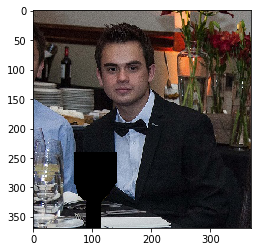

In [81]:
plt.imshow(imagen_a_predecir_beto)

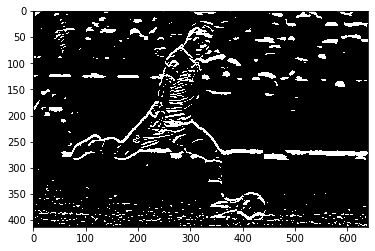

In [82]:
tolerancia = 100

imagen_definida_vargas = definicion_imagen(filtro_sobel_combinado_3_Y_vargas, tolerancia)
plt.imshow(imagen_definida_vargas)

In [83]:
#busqueda_horizontal(imagen_definida, altura, pto_inicio)
for i in range(345, 413):
    print("Iteracion", i)
    print(busqueda_horizontal(imagen_definida_vargas, i, 410))

Iteracion 345
[0, 640]
Iteracion 346
[0, 640]
Iteracion 347
[0, 411]
Iteracion 348
[409, 410]
Iteracion 349
[409, 410]
Iteracion 350
[409, 410]
Iteracion 351
[409, 410]
Iteracion 352
[408, 424]
Iteracion 353
[401, 427]
Iteracion 354
[402, 431]
Iteracion 355
[402, 431]
Iteracion 356
[399, 430]
Iteracion 357
[399, 428]
Iteracion 358
[400, 428]
Iteracion 359
[401, 429]
Iteracion 360
[401, 434]
Iteracion 361
[409, 410]
Iteracion 362
[409, 410]
Iteracion 363
[409, 410]
Iteracion 364
[409, 410]
Iteracion 365
[409, 410]
Iteracion 366
[409, 439]
Iteracion 367
[408, 440]
Iteracion 368
[407, 441]
Iteracion 369
[407, 441]
Iteracion 370
[407, 441]
Iteracion 371
[406, 640]
Iteracion 372
[390, 640]
Iteracion 373
[390, 631]
Iteracion 374
[403, 634]
Iteracion 375
[404, 415]
Iteracion 376
[404, 412]
Iteracion 377
[402, 413]
Iteracion 378
[388, 640]
Iteracion 379
[399, 477]
Iteracion 380
[399, 492]
Iteracion 381
[389, 444]
Iteracion 382
[397, 443]
Iteracion 383
[398, 442]
Iteracion 384
[400, 429]
Iterac

In [84]:
for i in range(349,353):
    print("Iteracion:", i)
    print(int(((401-409)/5)*(i-348) + 409))
    print("----------")

Iteracion: 349
407
----------
Iteracion: 350
405
----------
Iteracion: 351
404
----------
Iteracion: 352
402
----------


In [85]:
for i in range(349, 353):
    print("Iteracion:", i)
    print(int(((427-410)/5)*(i-348) + 410))
    print("------------")

Iteracion: 349
413
------------
Iteracion: 350
416
------------
Iteracion: 351
420
------------
Iteracion: 352
423
------------


In [86]:
mascara_vargas = []
mascara_vargas.append([348, [409, 410]])
mascara_vargas.append([349, [407, 413]])
mascara_vargas.append([350, [405, 416]])
mascara_vargas.append([351, [404, 420]])
mascara_vargas.append([352, [402, 423]])
mascara_vargas.append([353, [401, 427]])
mascara_vargas.append([354, [401, 431]])
mascara_vargas.append([355, [400, 431]])
mascara_vargas.append([356, [400, 431]])
mascara_vargas.append([357, [400, 432]])
mascara_vargas.append([358, [399, 433]])
mascara_vargas.append([359, [399, 433]])
mascara_vargas.append([360, [399, 434]])
mascara_vargas.append([361, [399, 435]])
mascara_vargas.append([362, [399, 436]])
mascara_vargas.append([363, [399, 437]])
mascara_vargas.append([364, [399, 438]])
mascara_vargas.append([365, [399, 439]])
mascara_vargas.append([366, [399, 440]])
mascara_vargas.append([367, [399, 440]])
mascara_vargas.append([368, [399, 440]])
mascara_vargas.append([369, [399, 441]])
mascara_vargas.append([370, [398, 441]])
mascara_vargas.append([371, [397, 441]])
mascara_vargas.append([372, [396, 441]])
mascara_vargas.append([373, [395, 442]])
mascara_vargas.append([374, [394, 442]])
mascara_vargas.append([375, [393, 442]])
mascara_vargas.append([376, [392, 442]])
mascara_vargas.append([377, [392, 443]])
mascara_vargas.append([378, [391, 443]])
mascara_vargas.append([379, [391, 443]])
mascara_vargas.append([380, [390, 444]])
mascara_vargas.append([381, [389, 444]])
mascara_vargas.append([382, [390, 444]])
mascara_vargas.append([383, [391, 443]])
mascara_vargas.append([384, [392, 442]])
mascara_vargas.append([385, [393, 442]])
mascara_vargas.append([386, [394, 441]])
mascara_vargas.append([387, [395, 440]])
mascara_vargas.append([388, [396, 439]])
mascara_vargas.append([389, [397, 439]])
mascara_vargas.append([390, [398, 438]])
mascara_vargas.append([391, [399, 438]])
mascara_vargas.append([392, [400, 437]])
mascara_vargas.append([393, [401, 437]])
mascara_vargas.append([394, [402, 436]])
mascara_vargas.append([395, [403, 435]])
mascara_vargas.append([396, [404, 434]])
mascara_vargas.append([397, [405, 433]])
mascara_vargas.append([398, [406, 432]])
mascara_vargas.append([399, [407, 431]])
mascara_vargas.append([400, [409, 430]])

In [87]:
lista_1 = []
lista_2 = []

for k in mascara_vargas:
    lista_1.append(k[0])
    lista_2.append(k[1])
    
mascara_futbol = []
mascara_futbol.append(lista_1)
mascara_futbol.append(lista_2)

In [88]:
def imagen_sin_balon(imagen, mascara):
    matriz = []
    for i in range(len(imagen)):        
        fila = []
        for j in range(len(imagen[0])):
            if (348 <= i <= 400):
                indice = mascara[0].index(i)
                intervalo_1 = mascara[1][indice]
                intervalo = []
                for k in range(intervalo_1[0], intervalo_1[1]+1):
                    intervalo.append(k)
                if j in intervalo:
                    fila.append([0, 0, 0])
                else:
                    fila.append(imagen[i][j])
            else:
                fila.append(imagen[i][j])
        matriz.append(fila)
    return matriz

In [89]:
#Nueva Mascara

mascara_balon_final = []
lista_1 = []
lista_2 = []
for k in range(len(mascara_futbol[0])):
    lista_1.append(mascara_futbol[0][k])
    lista_2.append([mascara_futbol[1][k][0]-5,mascara_futbol[1][k][1]+5])

mascara_balon_final.append(lista_1)
mascara_balon_final.append(lista_2)

In [90]:
imagen_a_predecir_vargas = imagen_sin_balon(vargas, mascara_balon_final)

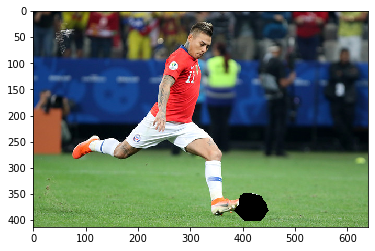

In [91]:
plt.imshow(imagen_a_predecir_vargas)

$RESUMEN$

A modo de resumen mostraremos las imagenes utilizadas para calcular las mascaras de los objetos en cada caso y la imagen con el objeto y sin el objeto

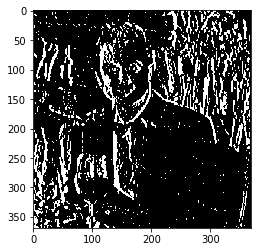

In [92]:
plt.imshow(imagen_definida_beto)

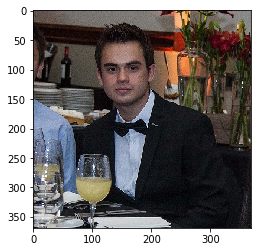

In [93]:
plt.imshow(beto)

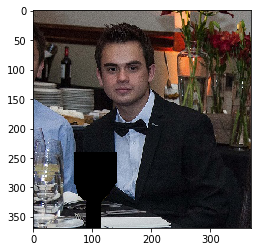

In [94]:
plt.imshow(imagen_a_predecir_beto)

In [95]:
imagen_a_predecir_beto_1 = imagen_sin_copa(filtro_media_1_beto, mascara_copa_final)

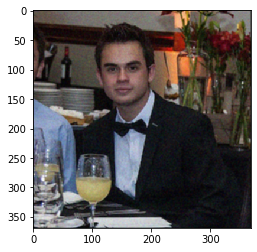

In [96]:
plt.imshow(filtro_media_1_beto)

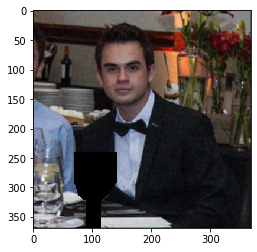

In [97]:
plt.imshow(imagen_a_predecir_beto_1)

In [98]:
imagen_a_predecir_beto_2 = imagen_sin_copa(filtro_media_2_beto, mascara_copa_final)

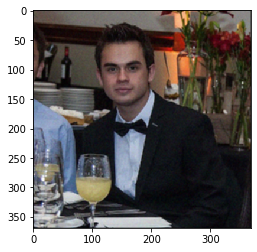

In [99]:
plt.imshow(filtro_media_2_beto)

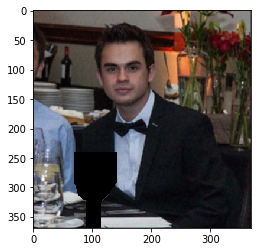

In [100]:
plt.imshow(imagen_a_predecir_beto_2)

In [101]:
imagen_a_predecir_beto_3 = imagen_sin_copa(filtro_media_3_beto, mascara_copa_final)

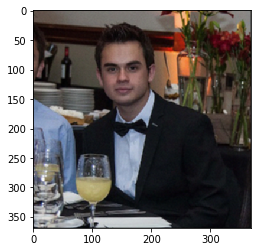

In [102]:
plt.imshow(filtro_media_3_beto)

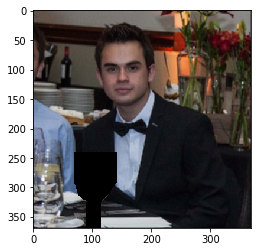

In [103]:
plt.imshow(imagen_a_predecir_beto_3)

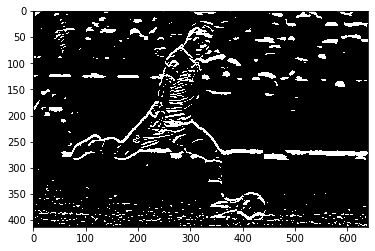

In [104]:
plt.imshow(imagen_definida_vargas)

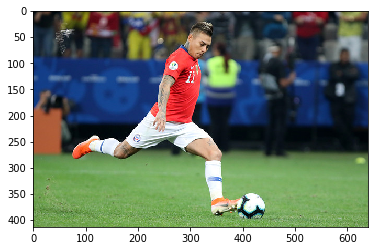

In [105]:
plt.imshow(vargas)

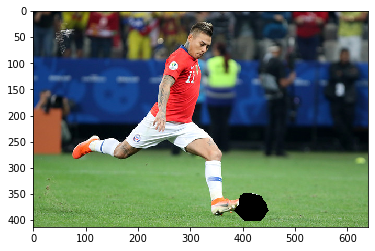

In [106]:
plt.imshow(imagen_a_predecir_vargas)

In [107]:
imagen_a_predecir_vargas_1 = imagen_sin_balon(filtro_media_1_vargas, mascara_balon_final)

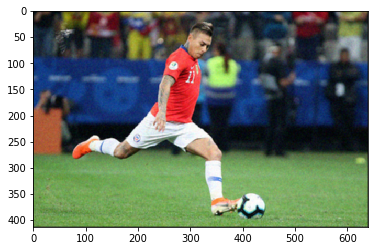

In [108]:
plt.imshow(filtro_media_1_vargas)

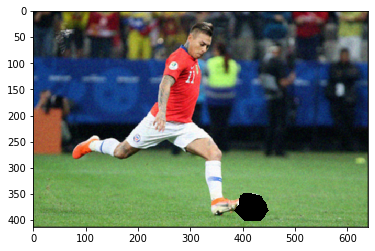

In [109]:
plt.imshow(imagen_a_predecir_vargas_1)

In [110]:
imagen_a_predecir_vargas_2 = imagen_sin_balon(filtro_media_2_vargas, mascara_balon_final)

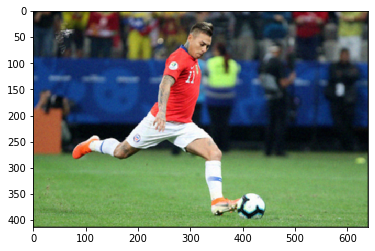

In [111]:
plt.imshow(filtro_media_2_vargas)

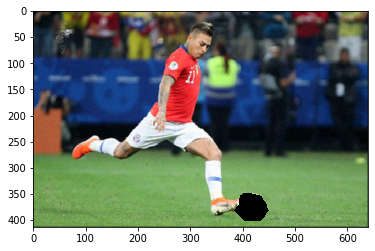

In [112]:
plt.imshow(imagen_a_predecir_vargas_2)

In [113]:
imagen_a_predecir_vargas_3 = imagen_sin_balon(filtro_media_3_vargas, mascara_balon_final)

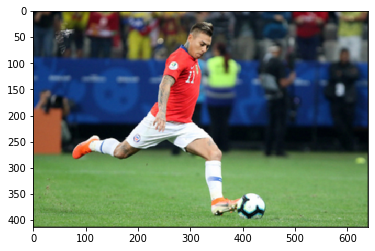

In [114]:
plt.imshow(filtro_media_3_vargas)

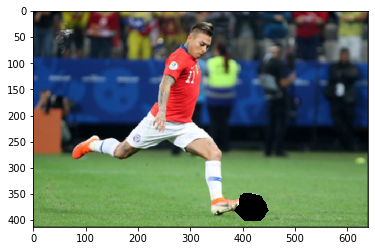

In [115]:
plt.imshow(imagen_a_predecir_vargas_3)